### Analysis on Eluvio_DS_Challenge dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Eluvio_DS_Challenge.csv')
df.shape

(509236, 8)

In [3]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [4]:
set(df['category'])

{'worldnews'}

The articles are all from category `worldnews`.

In [5]:
sum(df['down_votes'])

0

Notice that the sum of `down_votes` equals 0, which means every entry of `down_votes` is 0.

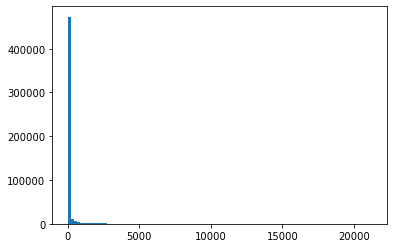

In [6]:
plt.hist(df['up_votes'], 100, density = False)
plt.show()

It's hard to view the distribution. Let's take a closer look using quantile.

In [7]:
np.quantile(df['up_votes'], 0.9)

97.0

90% of `up_votes` is less than 97. We round it up to 100 and draw another histogram to view the distribution more clearly.

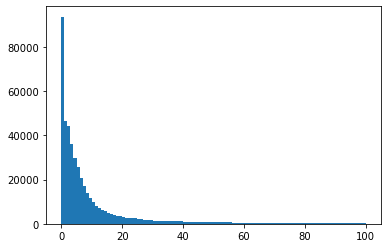

In [8]:
votes_100 = df[df['up_votes']<=100]['up_votes'] 
plt.hist(votes_100, 100, density = False) # votes_100 stands for up_votes less than 100
plt.show()

The number of `up_votes` decreases as the `up_votes` increases.

#### Using NLP
Firstly, take a quick look of our `title`.

In [9]:
import nltk

In [10]:
titles = list(df.title)

In [11]:
len(titles)

509236

In [12]:
titles[:5]

['Scores killed in Pakistan clashes',
 'Japan resumes refuelling mission',
 'US presses Egypt on Gaza border',
 'Jump-start economy: Give health care to all ',
 'Council of Europe bashes EU&UN terror blacklist']

#### 1. eliminate punctuations

In [13]:
import string
puncts = string.punctuation + '’‘—'
puncts

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~’‘—'

In [14]:
text = ["".join([char for char in a if char not in puncts]) for a in titles]
text[:5]

['Scores killed in Pakistan clashes',
 'Japan resumes refuelling mission',
 'US presses Egypt on Gaza border',
 'Jumpstart economy Give health care to all ',
 'Council of Europe bashes EUUN terror blacklist']

#### 2. tokenization

In [15]:
import nltk
nltk.download('punkt')
words = [ nltk.word_tokenize(a) for a in text ]
words[:5]

[nltk_data] Downloading package punkt to C:\Users\Hao
[nltk_data]     Tong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Scores', 'killed', 'in', 'Pakistan', 'clashes'],
 ['Japan', 'resumes', 'refuelling', 'mission'],
 ['US', 'presses', 'Egypt', 'on', 'Gaza', 'border'],
 ['Jumpstart', 'economy', 'Give', 'health', 'care', 'to', 'all'],
 ['Council', 'of', 'Europe', 'bashes', 'EUUN', 'terror', 'blacklist']]

#### 3. lowercase except 'US'

In [16]:
low_words = [[word.lower() if word != 'US' else 'US' for word in text] for text in words]
low_words[:5]

[['scores', 'killed', 'in', 'pakistan', 'clashes'],
 ['japan', 'resumes', 'refuelling', 'mission'],
 ['US', 'presses', 'egypt', 'on', 'gaza', 'border'],
 ['jumpstart', 'economy', 'give', 'health', 'care', 'to', 'all'],
 ['council', 'of', 'europe', 'bashes', 'euun', 'terror', 'blacklist']]

#### 4. eliminate stopwords

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Hao
[nltk_data]     Tong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
filtered_words = [[word for word in a if word not in stop_words] for a in low_words]
filtered_words[:5]

[['scores', 'killed', 'pakistan', 'clashes'],
 ['japan', 'resumes', 'refuelling', 'mission'],
 ['US', 'presses', 'egypt', 'gaza', 'border'],
 ['jumpstart', 'economy', 'give', 'health', 'care'],
 ['council', 'europe', 'bashes', 'euun', 'terror', 'blacklist']]

#### 5. lemmatization ('kisses' to 'kiss')

In [19]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Hao
[nltk_data]     Tong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
lemmatized_words =[[lmtzr.lemmatize(x) for x in a] for a in filtered_words]
lemmatized_words[:5]

[['score', 'killed', 'pakistan', 'clash'],
 ['japan', 'resume', 'refuelling', 'mission'],
 ['US', 'press', 'egypt', 'gaza', 'border'],
 ['jumpstart', 'economy', 'give', 'health', 'care'],
 ['council', 'europe', 'bash', 'euun', 'terror', 'blacklist']]

#### 6. Extract news related to country

In [21]:
import pycountry 

# country_names: all country names
country_names = [country.name.lower() for country in pycountry.countries]+['vietnam','US','uk','un','europe']

In [22]:
# Construct array ind indicating if country name in its title
ind = []

for i,ls in enumerate(lemmatized_words):
    for el in ls:
        if el in country_names:
            ind.append(i)
            break
        
ind[:6]

[0, 1, 2, 4, 7, 9]

In [23]:
# Extract news only related to country
new_df = df.loc[ind]
new_df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews


#### 7. Extract lemmatized tuples only include country names

In [24]:
# Construct ind_0_1 indicating whether have country name (0: No;1: Yes)
ind_0_1 = np.zeros(df.shape[0])
for i,ls in enumerate(lemmatized_words):
    for el in ls:
        if el in country_names:
            ind_0_1[i] = 1

ind_0_1[:5]

array([1., 1., 1., 0., 1.])

In [25]:
lemmatized_country_news = []

for i,j in enumerate(lemmatized_words):
    if ind_0_1[i]==1:
        lemmatized_country_news.append(j)

lemmatized_country_news[:5]

[['score', 'killed', 'pakistan', 'clash'],
 ['japan', 'resume', 'refuelling', 'mission'],
 ['US', 'press', 'egypt', 'gaza', 'border'],
 ['council', 'europe', 'bash', 'euun', 'terror', 'blacklist'],
 ['un', 'mismanagement', 'program']]

#### 8. Get frequency table of country names

In [26]:
# Our dictionary is country_names

In [28]:
import itertools
word_list = list(itertools.chain.from_iterable(lemmatized_country_news))
from collections import Counter
freq = pd.DataFrame.from_dict(Counter(word_list),orient='index')

In [29]:
freq.sort_values(by=0, ascending=False)

,0
US,38037
china,25754
say,16833
israel,15476
un,12404
...,...
denuding,1
minimized,1
vivre,1
ytn,1


#### 9. Build a frequency matrix of country names

In [31]:
word_embedding = np.zeros([len(lemmatized_country_news),len(country_names)])

for i,x in enumerate(lemmatized_country_news):
    for j,y in enumerate(country_names):
        word_embedding[i,j] = sum([z == y for z in x])

word_embedding

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
word_embedding.shape

(231259, 254)

#### 10. concat the new_df with our frequency matrix and write the output to a csv.

In [51]:
new_df.index = range(new_df.shape[0])
df2 = pd.concat([new_df, pd.DataFrame(word_embedding, columns=country_names)], axis = 1)
df2.shape # Check the dimensions to confirm we get correct outputs.

(231259, 262)

In [56]:
df2.to_csv('df_w_matrix.csv', index = False)